## About This Project

This project is focused on the detection of 'Aksara Bali' - a traditional Balinese script. The goal is to develop a machine learning model that can accurately identify different characters in the Aksara Bali script.

The project involves several steps, including data collection, data preprocessing, model training, and model evaluation. The data consists of images of different Aksara Bali characters, which are stored in separate directories for each character.

The model is built using TensorFlow, a popular machine learning library. It uses a Convolutional Neural Network (CNN), which is a type of deep learning model particularly effective for image classification tasks.

The model's performance is evaluated based on its accuracy in predicting the correct Aksara Bali character from the images in the validation set. Various strategies, such as regularization and learning rate adjustment, are employed to optimize the model's performance and prevent overfitting.

The project is a significant contribution to the preservation and digitization of traditional scripts, enabling more efficient and accurate recognition of Aksara Bali characters.

### Preparation Files for Making Models

For prepare this project you can download the dataset from https://drive.google.com/drive/folders/1STj-TVq42OYVbbtfBHML00313Y0TKFTU?usp=drive_link

### Preparation Models

In [1]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%cd D:/SELF/ML/aksara-detection/code/findingbali/dataset

D:\SELF\ML\aksara-detection\code\findingbali\dataset


In [3]:
list_aksara = {
    0: 'adeg-adeg',
    1: 'ba',
    2: 'bisah',
    3: 'ca',
    4: 'cecek',
    5: 'da',
    6: 'delapan',
    7: 'dua',
    8: 'empat',
    9: 'enam',
    10: 'ga',
    11: 'gantungan ba',
    12: 'gantungan ca',
    13: 'gantungan da',
    14: 'gantungan ga',
    15: 'gantungan ha',
    16: 'gantungan ja',
    17: 'gantungan ka',
    18: 'gantungan la',
    19: 'gantungan ma',
    20: 'gantungan na',
    21: 'gantungan nga',
    22: 'gantungan nya',
    23: 'gantungan pa',
    24: 'gantungan ra',
    25: 'gantungan sa',
    26: 'gantungan ta',
    27: 'gantungan wa',
    28: 'gantungan ya',
    29: 'ha',
    30: 'ja',
    31: 'ka',
    32: 'la',
    33: 'lima',
    34: 'ma',
    35: 'na',
    36: 'nga',
    37: 'nya',
    38: 'pa',
    39: 'pepet',
    40: 'ra',
    41: 'sa',
    42: 'satu',
    43: 'sembilan',
    44: 'suku',
    45: 'surang',
    46: 'ta',
    47: 'taleng',
    48: 'taleng tedong',
    49: 'tedong',
    50: 'tiga',
    51: 'tujuh',
    52: 'ulu',
    53: 'wa',
    54: 'ya'
}

list_aksara_array = np.array(list(list_aksara.values()))

for key, value in list_aksara.items():
    source_path = f"D:/SELF/ML/aksara-detection/code/findingbali/dataset/{value}"
    if not os.path.exists(source_path):
        os.makedirs(source_path)
    print(f"There are {len(os.listdir(source_path))} images of {value}")


There are 99 images of adeg-adeg
There are 93 images of ba
There are 101 images of bisah
There are 98 images of ca
There are 97 images of cecek
There are 95 images of da
There are 95 images of delapan
There are 91 images of dua
There are 96 images of empat
There are 101 images of enam
There are 98 images of ga
There are 76 images of gantungan ba
There are 79 images of gantungan ca
There are 71 images of gantungan da
There are 73 images of gantungan ga
There are 78 images of gantungan ha
There are 72 images of gantungan ja
There are 79 images of gantungan ka
There are 75 images of gantungan la
There are 75 images of gantungan ma
There are 76 images of gantungan na
There are 77 images of gantungan nga
There are 72 images of gantungan nya
There are 77 images of gantungan pa
There are 75 images of gantungan ra
There are 81 images of gantungan sa
There are 77 images of gantungan ta
There are 73 images of gantungan wa
There are 74 images of gantungan ya
There are 96 images of ha
There are 10

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Model configuration
batch_size = 32
img_width, img_height, img_num_channels = 150, 150, 3
no_classes = 55
no_epochs = 100
optimizer = Adam()
verbosity = 1
num_folds = 10

# Define the paths for the dataset
train_path = "D:/SELF/ML/aksara-detection/code/findingbali/crossvalidation/train"
test_path = "D:/SELF/ML/aksara-detection/code/findingbali/crossvalidation/test"

# Define the image data generator
datagen = ImageDataGenerator(rescale=1./255)

# Load the training dataset
train_generator = datagen.flow_from_directory(
  train_path,
  target_size=(img_width, img_height),
  batch_size=batch_size,
  class_mode='categorical')

# Load the test dataset
test_generator = datagen.flow_from_directory(
  test_path,
  target_size=(img_width, img_height),
  batch_size=batch_size,
  class_mode='categorical')

# Get the input and target data
input_train, target_train = train_generator.next()
input_test, target_test = test_generator.next()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.7))  # Increase dropout rate
  model.add(Dense(no_classes, activation='softmax'))


  # Compile the model
  model.compile(loss=categorical_crossentropy,
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Split the training data into training and validation sets
  val_split = 0.2
  train_indices = int(len(train) * (1 - val_split))
  train_data = inputs[train[:train_indices]]
  train_targets = targets[train[:train_indices]]
  val_data = inputs[train[train_indices:]]
  val_targets = targets[train[train_indices:]]

  # Fit data to model with validation data
  history = model.fit(train_data, train_targets,
                      validation_data=(val_data, val_targets),
                      batch_size=batch_size,
                      epochs=no_epochs,
                      verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Found 3987 images belonging to 55 classes.
Found 1026 images belonging to 55 classes.
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
2/2 [==============================] - 2s 652ms/step - loss: 4.0082 - accuracy: 0.0222 - val_loss: 4.0094 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 45ms/step - loss: 3.9994 - accuracy: 0.0667 - val_loss: 4.0244 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 44ms/step - loss: 3.9803 - accuracy: 0.0222 - val_loss: 4.0518 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 46ms/step - loss: 3.9400 - accuracy: 0.0667 - val_loss: 4.0789 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 45ms/step - loss: 3.8873 - accuracy: 0.0222 - val_loss: 4.1134 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 43ms/step - loss: 3.8364 - accuracy: 0.022

In [5]:
# Define the path to save the model
model_path = "D:/SELF/ML/aksara-detection/code/findingbali/model/modelcross.h5"

# Save the model
model.save(model_path)


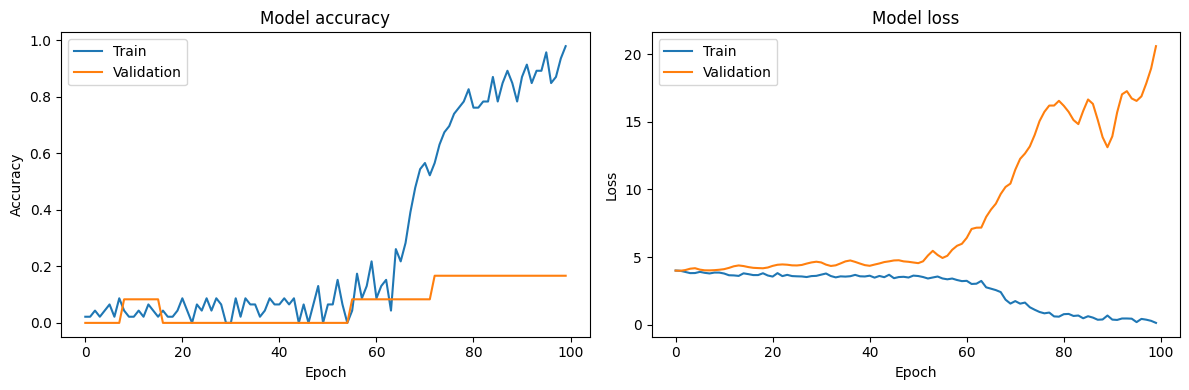

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the model from the file
model = tf.keras.models.load_model("D:/SELF/ML/aksara-detection/code/findingbali/model/modelcross.h5")

# Assume history is the returned object from model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  # Add this line to plot validation accuracy
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')  # Update legend labels

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])  # Add this line to plot validation loss
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')  # Update legend labels

plt.tight_layout()
plt.show()


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model("D:/SELF/ML/aksara-detection/code/findingbali/model/modelcross.h5")

# Function to classify the input image
def classify_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    confidence = prediction[0][class_index]

    return class_index, confidence

# Update the labels dictionary with class mappings
labels = {
    0: 'Adeg-Adeg',
    1: 'Ba',
    2: 'Bisah',
    3: 'Ca',
    4: 'Cecek',
    5: 'Da',
    6: 'Delapan',
    7: 'Dua',
    8: 'Empat',
    9: 'Enam',
    10: 'Ga',
    11: 'Gantungan Ba',
    12: 'Gantungan Ca',
    13: 'Gantungan Da',
    14: 'Gantungan Ga',
    15: 'Gantungan Ha',
    16: 'Gantungan Ja',
    17: 'Gantungan Ka',
    18: 'Gantungan La',
    19: 'Gantungan Ma',
    20: 'Gantungan Na',
    21: 'Gantungan Nga',
    22: 'Gantungan Nya',
    23: 'Gantungan Pa',
    24: 'Gantungan Ra',
    25: 'Gantungan Sa',
    26: 'Gantungan Ta',
    27: 'Gantungan Wa',
    28: 'Gantungan Ya',
    29: 'Ha',
    30: 'Ja',
    31: 'Ka',
    32: 'La',
    33: 'Lima',
    34: 'Ma',
    35: 'Na',
    36: 'Nga',
    37: 'Nya',
    38: 'Pa',
    39: 'Pepet',
    40: 'Ra',
    41: 'Sa',
    42: 'Satu',
    43: 'Sembilan',
    44: 'Suku',
    45: 'Surang',
    46: 'Ta',
    47: 'Taleng',
    48: 'Taleng Tedong',
    49: 'Tedong',
    50: 'Tiga',
    51: 'Tujuh',
    52: 'Ulu',
    53: 'Wa',
    54: 'Ya'
}



### Checking Models

In [8]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Cecek.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 432ms/step
The photo belongs to class 'Satu' with confidence 1.00


In [9]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Da.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Satu' with confidence 1.00


In [13]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Enam.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 16ms/step
The photo belongs to class 'Na' with confidence 1.00


In [25]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Gantungan Ka.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 16ms/step
The photo belongs to class 'Gantungan Ka' with confidence 0.79


In [26]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Gantungan Ta.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 18ms/step
The photo belongs to class 'Na' with confidence 0.44


In [27]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Gantungan Ya.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Gantungan Ya' with confidence 0.93


In [28]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ka.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 18ms/step
The photo belongs to class 'Ka' with confidence 1.00


In [29]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ma.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 15ms/step
The photo belongs to class 'Satu' with confidence 0.69


In [34]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Na.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Ka' with confidence 0.95


In [35]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Pepet.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Pepet' with confidence 0.98


In [36]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Suku.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Suku' with confidence 0.99


In [37]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ta.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 15ms/step
The photo belongs to class 'Ta' with confidence 0.63


In [38]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ulu.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 20ms/step
The photo belongs to class 'Ulu' with confidence 0.69


In [39]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ya.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Ya' with confidence 0.97


### Saving Models

In [51]:
model_json = model.to_json()
with open("aksarabali5.json", "w") as json_file:
    json_file.write(model_json)

model.save("D:/SELF/ML/aksara-detection/code/findingbali/hasil/aksarabali5.json")

INFO:tensorflow:Assets written to: D:/SELF/ML/aksara-detection/code/findingbali/hasil/aksarabali5.json\assets


INFO:tensorflow:Assets written to: D:/SELF/ML/aksara-detection/code/findingbali/hasil/aksarabali5.json\assets
